## Project 1 - Part 3

## Team Info 

Project Title: Credit Card Fraud Detection

Team Name: FraudBusters

Team Members: 
    Sanju Kanumuri (sanju), 
    Emanda Seifu (emandats),
    Brianna Detter (bdetter),
    Rahul Ramakrishnan (rramakrishnan106), &
    Harsha Paladugu (harshanba34)

## Project Introduction

Project topic: Digital fraud has been one of the biggest illegal markets in recent times. From black market websites selling credit card information to fishing messages trying to access your personal information, financial fraud is a big issue that currently needs to be tackled. Our project will be looking over a Kaggle database that presents different features of online transactions. This training data has a column with a boolean value of 0 or 1 telling us whether or not the transaction is fraudulent. With this information, we plan on finding trends within the data that tell us what factors most contribute to fraud.


Potential research questions you plan to address: 
What are indicators of credit card fraud attempts? 
What spending patterns that indicate fraud?  

Description of potential source data: 
"We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods."
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
https://www.kaggle.com/datasets/ealaxi/paysim1


Using the information above, we plan on plotting the data, finding a regression line, finding patterns with fraudulant and nonfrrudaulant data

## Question 
What factors contribute to a transcation being flagged as fraud? 
Moreover, how can we visualize the data to best understand the most important factors in detecting fraud?

#### Motivation:

As we have mentioned above, digital fraud has continued to increase over the past several years and can be cited as one of the ways that illegal markets/groups will target an individual's personal information. Based on the data from Kaggle, we want to find out what different aspects of online transactions that be linked to a transcation being flagged as fraud. 

#### Methods:

One way we are planning to research this is using Multi-dimensional Scaling (MDS) with a normalized data set in order to get a better understanding for the relationship between different features and what transactions are marked as fraud. In addition to this, we also plan to use other tools such as pie charts, bar graphs, etc. to provide readers with several varying visuals of the information provided by the Kaggle database.

## Analysis

### Data
The dataset on Kaggle, titled "Synthetic Financial Datasets For Fraud Detection," consists of a synthetic dataset generated by the PaySim mobile money simulator. This simulator mimics the transactional patterns of real-world financial systems at scale, primarily designed to provide data for research into fraud detection methods. The dataset includes several types of transactions, and it is labeled with indicators of fraudulent activity, making it a valuable resource for developing and testing fraud detection algorithms.

### Data Processing 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
# from geopy.distance import geodesic
# from geopy.geocoders import Nominatim

In [2]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape
df.info()
# print(len(df[df['type'].unique()]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


###  Visualization of Dataset 
We formed visualizations to detect or understand patterns within credit card fraud. By comparing the distributions of transaction amounts between fraudulent and non-fraudulent transactions, analysts can identify anomalies or patterns characteristic of fraud. Moreover, understanding the distribution of payment types assists in recognizing which channels might be more susceptible to fraud.

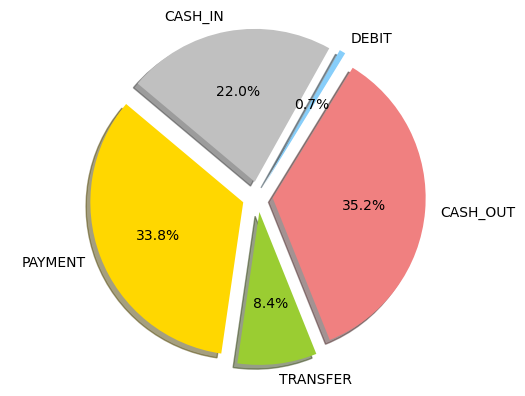

In [4]:
# Data to plot
labels = 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT' ,  "CASH_IN"
sizes = [len(df[df['type']=="PAYMENT"]), len(df[df['type']=="TRANSFER"]), len(df[df['type']=="CASH_OUT"]),  len(df[df['type']=="DEBIT"]),  len(df[df['type']=="CASH_IN"])]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','silver']
explode = (0.1, 0.1, 0.1, 0.1,0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

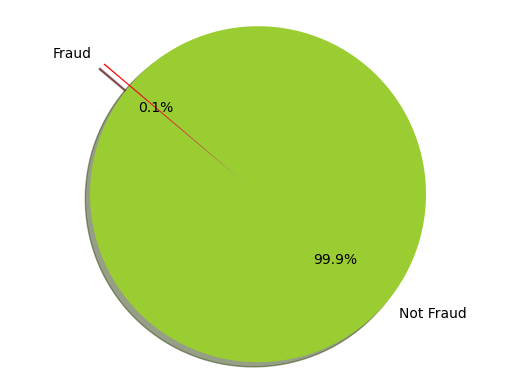

In [5]:
# Data to plot
labels_bar = 'Not Fraud', 'Fraud'
heights_bar = [len(df[df['isFraud']==0]), len(df[df['isFraud']==1])]
colors_bar = ['yellowgreen', 'red']
explode_bar = (0.1, 0.1)

# Plot
plt.pie(heights_bar, explode=explode_bar, labels=labels_bar, colors=colors_bar,
    autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

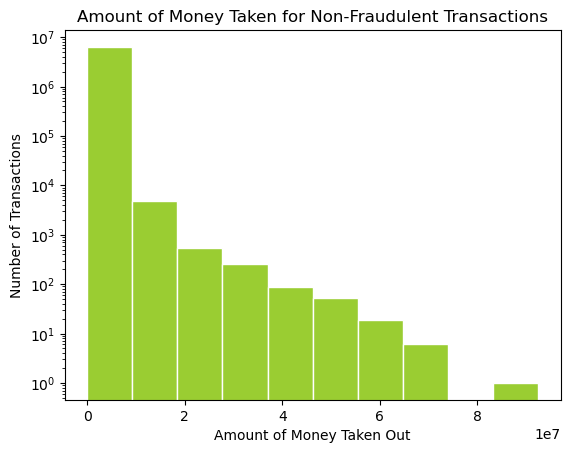

In [6]:
nonfraud_data = df[df['isFraud'] == 0]
plt.hist(nonfraud_data.amount, color='yellowgreen', edgecolor='w')
plt.yscale('log')

plt.xlabel("Amount of Money Taken Out")
plt.ylabel("Number of Transactions")
plt.title("Amount of Money Taken for Non-Fraudulent Transactions")

plt.show()

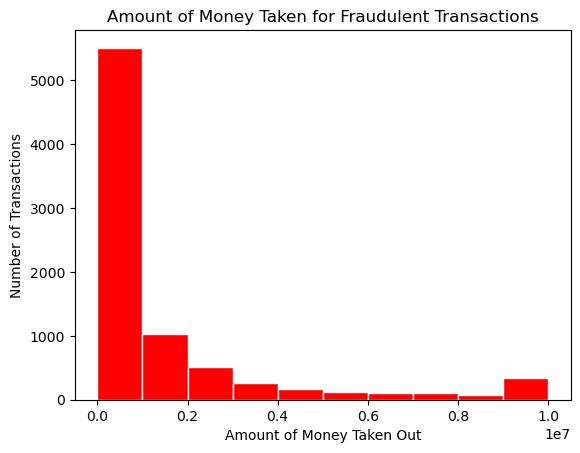

In [7]:
fraud_data = df[df['isFraud'] == 1]
plt.hist(fraud_data.amount, color='red', edgecolor='w')

plt.xlabel("Amount of Money Taken Out")
plt.ylabel("Number of Transactions")
plt.title("Amount of Money Taken for Fraudulent Transactions")

plt.show()

In [8]:
# Link to what I was looking at:
# https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/KNN/KNN.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# for scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier

x = df.drop(['isFraud', 'isFlaggedFraud', 'type', 'nameOrig', 'nameDest'], axis = 1)
y = df['isFraud']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    random_state = 0,
                                                    test_size = .2)

# Reduce dimension to 2 with PCA
std_clf = make_pipeline(StandardScaler(),
                        PCA(n_components=2, random_state=0),
                        KNeighborsClassifier(n_neighbors=5))

In [ ]:
std_clf.fit(x_train, y_train)
pred_test_std = std_clf.predict(x_test)

In [ ]:
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

In [ ]:
# Extract PCA from pipeline
pca_std = std_clf.named_steps['pca']

# Use PCA with scale on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
x_train_std_transformed = pca_std.transform(scaler.transform(x_train))

# visualize standardized  with PCA performed
for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    plt.scatter(x_train_std_transformed[y_train == l, 0],
                x_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

plt.title('Standardized training dataset after PCA')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.legend(loc='upper right')
plt.grid()

plt.tight_layout()

### Boxplot of Transaction Types and Amount Spent


In [ ]:
ax = df.boxplot(column=['amount'], by='type')

ax.set_xlabel('Transaction Type')
ax.set_ylabel('Amount')

ax

### Continuation of Analysis 
Based on the graphs above we have analsyized the following: 

Distribution of Payment Types: The first pie chart offers insight into the relative frequencies of different payment types within the dataset. It's a helpful visualization for understanding which transaction types are most common. In the simulated data, each payment type is represented proportionally, showcasing how diverse the transaction types are within the dataset.

Distribution of Fraud vs Non-Fraud: This second pie chart represents the distribution between fraudulent and non-fraudulent activities within a dataset. It shows a very small sliver, 0.1%, of the data being attributed to fraud, while the overwhelming majority, 99.9%, is not fraud. This visualization highlights the typical imbalance in datasets concerning fraudulent transactions where fraudulent activities are a very small minority. 

Distribution of Transaction Amounts (Non-Fraudulent): The first  histogram for non-fraudulent transactions displays the frequency distribution of transaction amounts. Typically, such a distribution helps identify common transaction sizes and how they cluster around certain values. The skewed nature of the distribution suggests that lower transaction amounts are more common, with fewer high-value transactions.

Distribution of Transaction Amounts (Fraudulent): Similarly, this second histogram for fraudulent transactions highlights the distribution of transaction amounts specifically within fraudulent activities. Comparing this graph to the non-fraudulent transactions' histogram could reveal differences in transaction behaviors between fraudulent and legitimate activities. The distribution is again skewed, indicating that fraud attempts might also focus on lower value transactions, but the tail might extend further, suggesting attempts at higher value frauds as well.

Boxplot of Transaction Types and Amount Spent: While this information is also conveyed in some other formats, this box and whisker plot highlights which payment types are most used within this data set. According to the information above, transfers account for a majority of the payment amounts. The second most used is cash out, followed by cash in then debit at last position along with payment. 

This data is important to visualize as it can give an idea for preventative measures that should be taken to reduce fraud. Since transfers are the largest payment types, adding more security procedures such as more checkpoints before allowing for money to be transferred from one account to another. In addition to this, adding questions to ensure the money is transferred to the correct individual/group would reduce and minimize the potential opportunities for fraud. 

### Correlation Analysis 


In [ ]:
# Select only the numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Variables")
plt.show()


The heatmap analysis of our dataset has shed light on the relationships between transactional features and fraudulent activity. The results reveal a notable absence of strong linear correlations among the majority of numerical features and instances of fraud, indicated by isFraud. This suggests that the characteristics of fraudulent transactions are not directly related to the measured variables, such as the transaction amount, account balances before and after transactions, or the transaction step time. Furthermore, the disconnection between isFlaggedFraud and isFraud suggests a misalignment in the current mechanisms used to flag potential fraud. Consequently, this necessitates a shift in our project strategy towards more sophisticated analytical techniques. The next phase will explore the use of complex algorithms that can detect subtle patterns and interactions beyond the reach of simple linear models. We will delve into multi-dimensional scaling and anomaly detection and consider enhancing our feature set to better characterize fraudulent behavior. Additionally, the categorical variables warrant further examination through encoding techniques and cluster analysis. These efforts aim to reveal the elusive patterns of digital fraud and contribute to the development of robust detection systems essential for modern finance. As we embrace a multi-faceted analytical approach, we stand to deepen our understanding of fraud detection in the digital domain.

## Follow Up Questions 

In light of the findings thus far, our project stands at the cusp of further discovery, prompting us to consider additional avenues of inquiry to better decipher the complexities of credit card fraud detection:

1. **Categorical Dynamics**: With the transaction type being a categorical variable, how might its various categories correlate with fraudulent occurrences? The exploration of encoding these categorical variables could offer a clearer depiction of their influence.

2. **Chronological Fluctuations**: Does the variable 'step', indicative of time, play a role in the frequency of fraud? Identifying patterns over time could shed light on whether fraud attempts are concentrated within specific intervals.

3. **Detection Sensitivity**: Considering the rarity of fraudulent transactions, what methods can we employ to enhance our model's sensitivity to detect such scarce events? Are there alternative analytical strategies or specific performance metrics that could improve detection accuracy?

4. **Algorithm Efficacy**: In the quest to identify the most proficient machine learning algorithms for our purpose, we must ask— which models excel in capturing the intricate patterns of fraud within our dataset? How do these models fare against one another in terms of their predictive prowess?

5. **Innovative Feature Creation**: What innovative features could be engineered to serve as more potent indicators of fraudulent activity? Could certain derived ratios or differences between balances provide a more telling signal?

6. **Flagging System Refinement**: The criteria for transactions being flagged as fraudulent merit reevaluation. How can we enhance the flagging mechanism to better align with genuine instances of fraud based on our analytical insights?

7. **Real-World Application**: How will our model stand the test against real-world data? The integration of external datasets and factors might be imperative in refining our predictive capabilities.

8. **Preventive Measures**: Finally, how can we translate our analytical conclusions into actionable measures for real-time fraud prevention in digital financial ecosystems?

Addressing these queries is the logical progression of our research endeavor. As we further this scholarly pursuit, our collective aim is to sculpt a comprehensive and dynamic approach to combating digital financial fraud, bolstering the defenses of the financial domain against such nefarious activities.

## Conclusion 



In conclusion, this phase of the project has allowed us to delve deeper into the correlations between fraud and digital transactions. After discussing possible approaches for analyzing the data, we decided to use multi-dimensional scaling (MDS) after normalizing the data provided from the Kaggle database. Using the updated data, we created graphs to highlight different factors that play a role in digital fraud via visual representation. The analysis provides more information about each chart. In phase 3 of this project, we will continue to analyze the 
relationship between digital transactions and said transactions being marked as fraud. 


## Team Member Contribution 
#### Sanju - 
#### Emanda -  Created box and whisker plot, wrote up analysis 
#### Brianna - 
#### Harsha - 
#### Rahul - 